# Ford GoBike System Data Analysis

### by Mahyar Khatirinejad

##  About the Dataset 

***This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Bay Area Bike Share Trips Data available at:
https://www.google.com/url?q=https://www.fordgobike.com/system-data&sa=D&ust=1554486256012000***

***San Francisco offers bike ride services as a way for commuters / visitors to travel through the congested city lanes. There are about 700 bikes available through the network and the dataset incldues bike share trips data that comprises trip details from August 2013 through August 2016. Details include trip information such as duration, start and end stations, subscriber type, etc.***

***There are 11070 bikes in this dataset with 2,506,983 rows and 15 features (duration_sec, start time, end time, start station id, start station name,start_station_latitude, start_station_longitude,end station id, end station name, end_station_latitude, end_station_longitude, bike_id, user_type, bike share for all trip, rental access method).***


## Gathering Data 

In [99]:
# import all the required packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import seaborn as sns
%matplotlib inline

In [100]:
data_files   = ['C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201901-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201902-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201903-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201904-fordgobike-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201905-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201906-baywheels-tripdata.csv',
                'C:/Us>ers/khati/Desktop/udacity/U-Data-visualization/biking_data/201907-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201908-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201909-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201910-baywheels-tripdata.csv',
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201911-baywheels-tripdata.csv',   
                'C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data/201912-baywheels-tripdata.csv']


In [101]:
bike_data = pd.concat([pd.read_csv(f,) for f in glob.glob("C:/Users/khati/Desktop/udacity/U-Data-visualization/biking_data" + "/*.csv")],ignore_index=True)

C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\khati\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


## Assessing Data

In [102]:
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN


In [103]:
print(bike_data.shape)
print(bike_data.dtypes)

(2506983, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
rental_access_method        object
dtype: object


In [104]:
sum(bike_data.duplicated())

0

In [105]:
#maybe i should drop the null columns
bike_data.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [106]:
bike_data.bike_id.value_counts()

3135      912
3146      911
3569      889
3249      882
1502      882
         ... 
3973        1
655034      1
92          1
3214        1
6271        1
Name: bike_id, Length: 11070, dtype: int64

In [107]:
bike_data.bike_id.nunique()

11070

In [108]:
bike_data.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [109]:
bike_data.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [110]:
bike_data.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

# Cleaning Dataset 

### 1. Define:
***Droping the "bike_share_for_all_trip" and "rental_access_method" becuse the first one is not documented and second one has so many NaN values.***
### Code:

In [111]:
bike_data.drop(['bike_share_for_all_trip','rental_access_method'],inplace=True,axis=1)

In [112]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
dtypes: float64(6), int64(2), object(5)
memory usage: 248.6+ MB


### 2. Define: 
***converting the 'start_station_id', 'end_station_id', 'bike_id', to strings***
   
***Converting the 'start_time' and 'end_time' to datatime***
### Code

In [113]:
bike_data['start_station_id']= bike_data['start_station_id'].astype('str')
bike_data['end_station_id']= bike_data['end_station_id'].astype('str')
bike_data['bike_id']= bike_data['bike_id'].astype('str')

bike_data['start_time']= bike_data['start_time'].astype('datetime64[ns]')
bike_data['end_time']= bike_data['end_time'].astype('datetime64[ns]')
#df_bike_clean['duration_sec']= df_bike_clean['duration_sec'].astype('datetime64[ns]')

In [114]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 248.6+ MB


In [115]:
# extract three columns for future data exploration and analysis from the start_time column
bike_data['month'] = pd.DatetimeIndex(bike_data['start_time']).month
#bike_data['trip_month'] = bike_data.start_time.dt.strftime('%b')
#bike_data['trip_day'] = bike_data.start_time.dt.strftime('%a')
#bike_data['trip_hour'] = bike_data.start_time.dt.strftime('%H')

In [116]:
bike_data.month.value_counts()

7     258102
3     256299
10    239895
4     239111
9     217986
8     210563
1     192082
6     191772
11    185496
2     183412
5     182163
12    150102
Name: month, dtype: int64

### 3. Define:

***Dropping non-essential columns for convenience:*** 

### Code:

In [117]:
bike_data.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [118]:
#We make a copy of the dataset to keep the original list unchanged when the new list is modified
df_bike_clean = bike_data.copy()
df_bike_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   bike_id             object        
 6   user_type           object        
 7   month               int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 153.0+ MB


# Investigating Dataset 

# Main areas of interest in the dataset
***1) Average trip times***

***2) Monthly bike ride trend by average trip times***

***3) 

# Features in the dataset which will support the investigation.¶
***The "duration_sec" column will define the average trip time. "Start_time", "end_time" columns will define monthly bike ride trends.***

# Univariate Exploration

### 1. Average Bike Trip Duration (Minutes)

In [119]:
#The seconds should be changed to minutes as the graph is too difficult to understand.
df_bike_clean['duration_min'] = df_bike_clean['duration_sec'] / 60

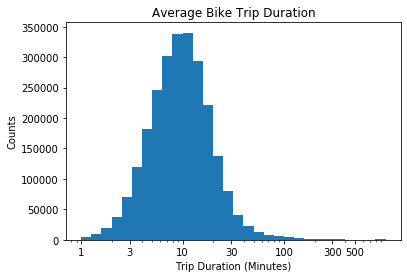

In [120]:
ticks =  [ 1 , 3, 10, 30, 100, 300, 500]
labels = ['{}'.format(v) for v in ticks]
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
plt.hist(data = df_bike_clean, x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Trip Duration (Minutes)');
plt.title('Average Bike Trip Duration');
plt.ylabel('Counts');

### Observation: 
***The plot shows that the majority of bike trips last 10 minutes.***


### 2. Months Distribution:

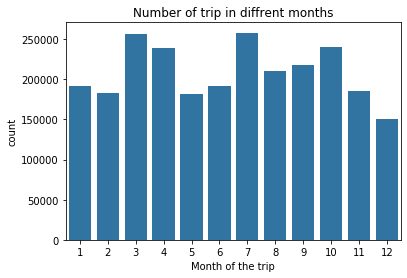

In [121]:
sb.countplot(data=df_bike_clean, x='month', color=sb.color_palette()[0]);
plt.xlabel('Month of the trip')
plt.title('Number of trip in diffrent months');

### Observation:
***The plot shows that less trips were taken by people during the winter, in general.***


# Bivariate Exploration

In [122]:
df_bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   duration_sec        int64         
 1   start_time          datetime64[ns]
 2   end_time            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   bike_id             object        
 6   user_type           object        
 7   month               int64         
 8   duration_min        float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 172.1+ MB


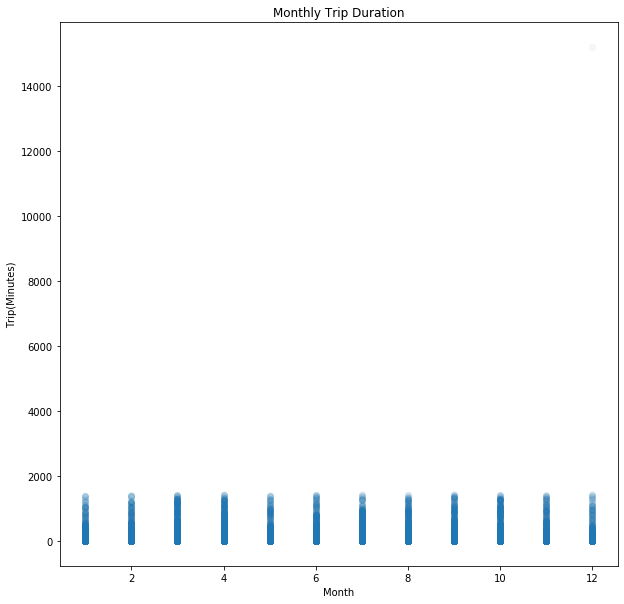

In [125]:
plt.figure(figsize = [10,10])
plt.scatter(data = df_bike_clean , x = 'month' , y = 'duration_min' , alpha = 1/20)
plt.title('Monthly Trip Duration')
plt.xlabel('Month')
plt.ylabel('Trip(Minutes)');



Text(9.924999999999997, 0.5, 'user_type')

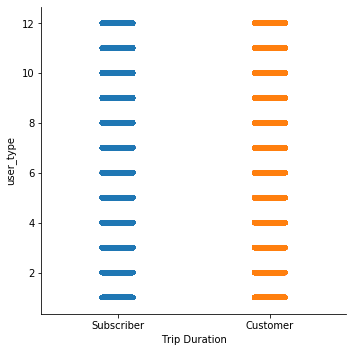

In [127]:

sb.catplot(x="user_type", y="month", data=df_bike_clean)
plt.xlabel('Trip Duration')
plt.ylabel('user_type')

Text(0, 0.5, 'Number of Trips')

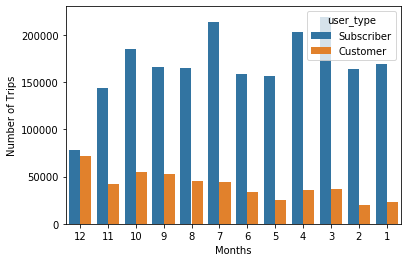

In [132]:
month_order = list(reversed(df_bike_clean.month.unique()))
  
sb.countplot(data=df_bike_clean, x='month', hue='user_type', order= month_order)
plt.xlabel('Months')
plt.ylabel('Number of Trips')